In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split


train = r"E:\kaggle\titanic competition\train.csv"
test = r"E:\kaggle\titanic competition\test.csv"
df_train = pd.read_csv(train,delimiter=',')
df_test  = pd.read_csv(test,delimiter=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
df_train.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)
df_test.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [6]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [8]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Fare'].fillna(df_test['Age'].median(),inplace=True)

In [9]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
df_train.dropna(inplace=True)

In [11]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [13]:
le       = preprocessing.LabelEncoder()
df_train = df_train.apply(le.fit_transform)
df_test  = df_test.apply(le.fit_transform)
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


In [14]:
df_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,74,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


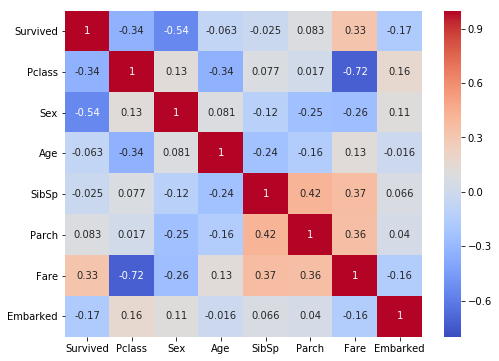

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_train.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

In [16]:
Ydata = df_train['Survived'] 
Xdata = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Xdata = (Xdata - Xdata.mean())/Xdata.std()

x_train, x_test, y_train, y_test =train_test_split(Xdata,Ydata,train_size=0.8,test_size=0.2,random_state=1)

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)
print(Y_pred)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

[1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)
print(acc_random_forest)

98.59


In [20]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
Y_pred = knn.predict(x_test) 
print(Y_pred)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

[1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0]


In [21]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
Y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train,y_train) * 100, 2)

In [22]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [23]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test) 
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [25]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.59,Random Forest
98.59,Decision Tree
87.20,KNN
78.90,Logistic Regression
78.76,Support Vector Machines
75.53,Naive Bayes
74.82,Perceptron
69.20,Stochastic Gradient Decent


In [26]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81944444 0.83333333 0.76388889 0.81944444 0.8028169  0.8028169
 0.81690141 0.75714286 0.77142857 0.77142857]
Mean: 0.7958646322378716
Standard Deviation: 0.026021527358756708


In [27]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.289
Age,0.278
Sex,0.223
Pclass,0.081
SibSp,0.052
Parch,0.041
Embarked,0.036


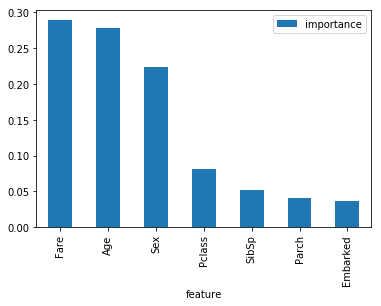

In [28]:
importances.plot.bar()

In [29]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5, 10, 25, 50, 70], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35], 'n_estimators': [100, 400, 700, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1500}

In [31]:
random_forest = RandomForestClassifier(criterion = 'entropy', 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
Y_prediction_ = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

#print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)
print('acc_random_forest :',acc_random_forest)

acc_random_forest : 90.44


In [32]:
print(Y_prediction)

[1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0]


In [33]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9734158315618989


In [41]:
Xtest = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Xtest = (Xtest - Xtest.mean())/Xtest.std()

Y_prediction_ = random_forest.predict(Xtest)

In [44]:
Y_prediction_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
df_submission=pd.read_csv(test,delimiter=',')
df_submission.drop(df_submission.columns.difference(['PassengerId']), 1, inplace=True)
df_submission['Survived']=Y_prediction_
df_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [46]:
df_submission.to_csv(r'E:\kaggle\titanic competition\gender_submission.csv', index = False)